In [ ]:
import numpy as np
import matplotlib as plt

In [ ]:
def Pafj(n):
  Q = 157.6e-9
  tau = 637.8e-9
  F = 5.2e6
  Paf = (Q / tau) * np.exp(-n / (F * tau))
  return Paf

In [ ]:
def Ps():
  tw = 2.5e-9
  mu = 0.14
  eta = 0.20
  Pph = 1 - np.exp(- mu * eta)
  Pdc = 1.144e-4
  return 1 - (1 - Pdc) * (1 - Pph)

In [ ]:
def Aprox(c):
  Pc = np.zeros(10000)
  Pc[0] = Ps()
  mult = 1
  tol = 1e-5
  for j in range(c):
    mult *= (1 - Pc[c-j-1] * (Pafj(j+1)))
  R = 1 - (1 - Pc[0]) * mult
  Pc[c] = R
  c += 1
  mult = 1
  while (abs((Pc[c-1] - Pc[c-2]) / Pc[c-2])) > tol:
    for j in range(c):
      mult *= (1 - Pc[c-j-1] * (Pafj(j+1)))
    R = 1 - (1 - Pc[0]) * mult
    Pc[c] = R
    c += 1
    mult = 1
  c = c - 1
  return Pc, c

Valor final de Pc =  0.08299965263689146
numero de iteraciones =  93


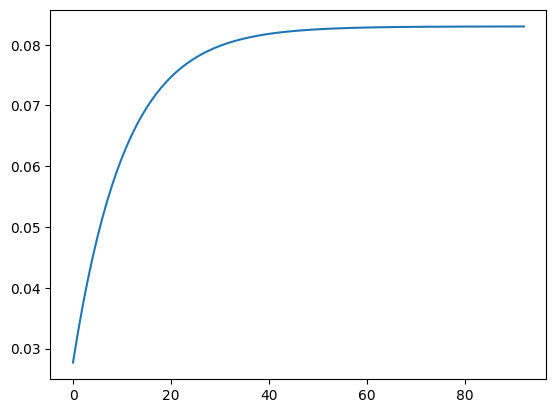

In [ ]:
c = 1
Pc, c = Aprox(c)
print('Valor final de Pc = ', Pc[c])
print('numero de iteraciones = ', c)
x = range(0, c)
plt.pyplot.plot(x, [Pc[i] for i in x])